# Compartmental models in epidemiology
## https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import random
import time
from IPython.display import clear_output
from collections import Counter

%matplotlib inline

In [2]:
club = nx.karate_club_graph()

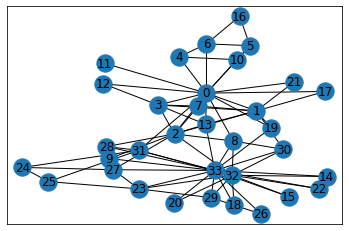

In [3]:
nx.draw_networkx(club)

In [4]:
INFECTED_COLOR = '#FF0000'
HEALTHY_COLOR = '#C0C0C0'
RECOVERED_COLOR = '#00FF00'

In [5]:
INFECTED_COLOR = '#FF0000'
HEALTHY_COLOR = '#C0C0C0'
RECOVERED_COLOR = '#00FF00'

I = 'I'
S = 'S'
R = 'R'

In [6]:
# Функция возвращает список из цветов для узлов на основе их статуса
def construct_color_list(infection_statuses):
        
    status_color_dict = {I: INFECTED_COLOR, S: HEALTHY_COLOR, R: RECOVERED_COLOR}
        
    colors = [status_color_dict.get(status) for status in infection_statuses]
    
    return colors

In [7]:
def show_infection_dynamic(history, delay = 1):
    
    infected_dynamic = []
    healthy_dynamic = []
    recovered_dynamic = []
    
    for index, history_step in enumerate(history):
        
        fig, ax = plt.subplots(ncols=1, figsize = (12,6))
        
        ax.set_ylabel('Count')
        ax.set_xlabel('Step')
        
        infected_dynamic.append(history_step.count(I)) # Подсчет количества зараженных и добавление в список
        healthy_dynamic.append(history_step.count(S)) # Подсчет количества здоровых и добавление в список        
        recovered_dynamic.append(history_step.count(R)) # Подсчет количества вылечившихся и добавление в список  
        steps = list(range(index+1))
        
        ax.plot(steps, infected_dynamic, label="Зараженные", color = INFECTED_COLOR)
        ax.plot(steps, healthy_dynamic, label="Здоровые", color = HEALTHY_COLOR)
        #ax.plot(steps, recovered_dynamic, label="Вылечившиеся", color = RECOVERED_COLOR)
        ax.legend()
        
        clear_output(True)
        
        ax.text(x = 0, 
                y = 0,
                fontdict = dict(size=10),
                s = f'Step: {index}', 
                horizontalalignment='left', 
                verticalalignment='bottom', 
                transform=ax.transAxes)
        
        
        
        plt.show()
        time.sleep(delay)

In [8]:
def show_infection_history(G, history, delay = 1, show_all_steps = False):
    
    for index, history_step in enumerate(history):
        
        fig, ax = plt.subplots(ncols=1, figsize = (12,6))
        
        # Создание списка из цветов для каждого узла для корректного отображения (Размерность G.nodes)
        colors = construct_color_list(history_step)
        
        if show_all_steps:
            pass
        else:
            clear_output(True)
        
        ax.text(x = 0, 
                y = 0,
                fontdict = dict(size=30),
                s = f'Step: {index}', 
                horizontalalignment='left', 
                verticalalignment='bottom', 
                transform=ax.transAxes)
        
        nx.draw_networkx(G, pos = nx.spring_layout(G, seed = 3), node_color = colors, ax = ax) # Отображение графа
        
        
        plt.show()
        time.sleep(delay)
             

## 5\.1\.1 Реализовать компьютерную симуляцию модели SI. 

* Логика модели:
    * каждый узел находится в одном из двух состояний $\{ S, I\}$
    * на 0-м шаге $c$ узлов устанавливаются в состояние $I$ (остальные - в $S$)
    * На каждом шаге каждый из инфецированных узлов с вероятностю $\beta$ заражает каждый из связанных с ним уязвимых узлов

In [9]:
def SI(steps, b, G, c):
    
    infected_nodes_start = random.choices(np.array(G.nodes), k = c) # Выбор узлов которые будут изначально заражены (параметр 'c')
    healthy_nodes_start = np.delete(np.array(G.nodes), infected_nodes_start) # Оставшиеся здоровые узлы

    G.add_nodes_from(infected_nodes_start, status = I) # Добавление зараженных узлов (фактически это замена)
    G.add_nodes_from(healthy_nodes_start, status = S) # Добавление здоровых узлов (фактически это замена)

    history = [] # Список для хранения истории заражения
    history.append([G.nodes[node]['status'] for node in G.nodes]) # Добавление нулевого шага в историю заражений

    # Цикл по количеству шагов
    for step in range(steps): 

        # Выбор всех зараженных узлов на данном этапе
        infected_nodes = [node for node in G.nodes if G.nodes[node]['status'] == I] 

        # Цикл по зараженным узлам  
        for infected_node in infected_nodes:

            # Выбор здоровых соседей зараженного узла
            healthy_neighbors = [node for node in G.neighbors(infected_node) if G.nodes[node]['status'] == S]

            # Цикл по здоровым соседям зараженного узла
            for healthy_neighbor in healthy_neighbors:

                rnd = random.random() # Случайное число [0,1)

                if rnd < b: # Если случайное число меньше параметра 'b', то данный узел становится зараженным
                    G.nodes[healthy_neighbor]['status'] = I

        history.append([G.nodes[node]['status'] for node in G.nodes]) # Добавление i-го шага в историю заражений

    return G, history 

In [10]:
steps1 = 10 # Количество шагов
b1 = 0.5 # Вероятность заражения при наличии связи за шаг
G1 = club.copy() # Граф
c1 = 1 # Количество изначально зараженных

In [11]:
G1, history_G1 = SI(steps1, b1, G1, c1)

## 5\.1\.2 Визуализировать динамику заражения узлов сети Карате-клуба в здадче 5.1.1 в виде графика динамики уязвимых и зраженных узлов.

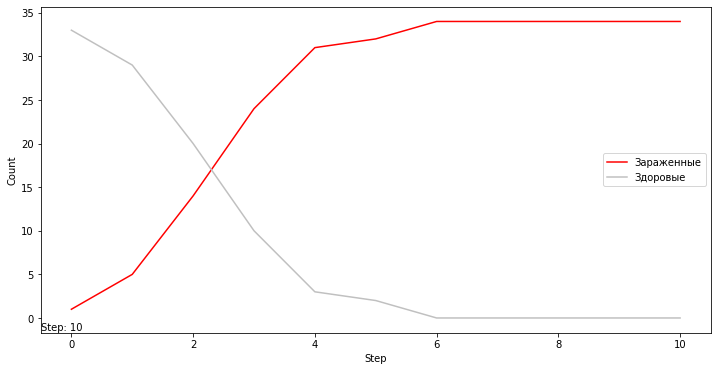

In [12]:
show_infection_dynamic(history_G1, delay = 0.3)

## 5\.1\.3 Реализовать пошаговую визуализацию модели SI из задачи 5.1.1 . Уязвимые и зараженные узлы отражаются цветом. Положения узлов не изменяются.

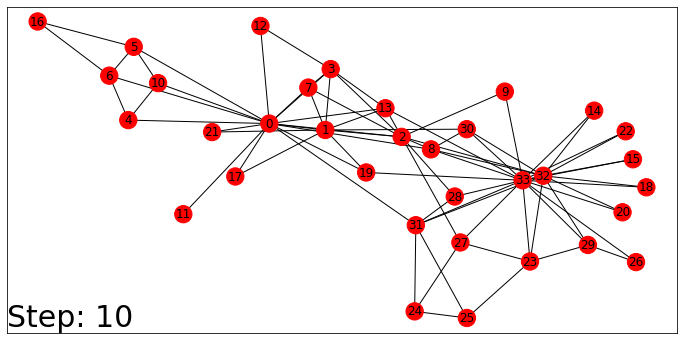

In [19]:
show_infection_history(G1, history_G1, delay = 1, show_all_steps=False)

## 5\.2\.1 Реализовать компьютерную симуляцию модели SIS:

* Логика модели:
    * каждый узел находится в одном из двух состояний $\{ S, I\}$
    * на 0-м шаге $c$ узлов устанавливаются в состояние $I$ (остальные - в $S$)
    * На каждом шаге каждый из инфецированных узлов с вероятностю $\beta$ заражает каждый из связанных с ним уязвимых узлов
    * Каждый инфецированный узел остается инфецированным $\tau_\gamma = 1/\gamma$ временных шагов, после чего возвращается в состояние $I$ (но может быть вновь инфецированным).

In [14]:
def SIS(steps, b, G, c, t):
    
    infected_nodes_start = random.choices(np.array(G.nodes), k = c) # Выбор узлов которые будут изначально заражены (параметр 'c')
    healthy_nodes_start = np.delete(np.array(G.nodes), infected_nodes_start) # Оставшиеся здоровые узлы

    G.add_nodes_from(infected_nodes_start, status = I, steps_till_healthy = t) # Добавление зараженных узлов (фактически это замена)
    G.add_nodes_from(healthy_nodes_start, status = S) # Добавление здоровых узлов (фактически это замена)

    history = [] # Список для хранения истории заражения
    history.append([G.nodes[node]['status'] for node in G.nodes]) # Добавление нулевого шага в историю заражений

    # Цикл по количеству шагов
    for step in range(steps):     
              
        # Выбор всех зараженных узлов на данном этапе
        infected_nodes = [node for node in G.nodes if G.nodes[node]['status'] == I]
                
        # Цикл по зараженным узлам  
        for infected_node in infected_nodes:
            
            # Для каждого зараженного узла вычитаем единицу из времени ожидания до перехода в статус I
            G.nodes[infected_node]['steps_till_healthy'] -= 1
            
            # Проверяем атрибут 'steps_till_healthy' (меняем статус, удаляем атрибут 'steps_till_healthy', переходим к следующему узлу сразу)
            if G.nodes[infected_node]['steps_till_healthy'] == 0:
                G.nodes[infected_node]['status'] = S
                del G.nodes[infected_node]['steps_till_healthy']
                continue

            # Выбор здоровых соседей зараженного узла
            healthy_neighbors = [node for node in G.neighbors(infected_node) if G.nodes[node]['status'] == S]

            # Цикл по здоровым соседям зараженного узла
            for healthy_neighbor in healthy_neighbors:

                rnd = random.random() # Случайное число [0,1)

                if rnd < b: # Если случайное число меньше параметра 'b', то данный узел становится зараженным
                    G.nodes[healthy_neighbor]['status'] = I
                    G.nodes[healthy_neighbor]['steps_till_healthy'] = t

        history.append([G.nodes[node]['status'] for node in G.nodes]) # Добавление i-го шага в историю заражений

    return G, history 

In [15]:
steps2 = 20 # Количество шагов
b2 = 0.5 # Вероятность заражения при наличии связи за шаг
G2 = club.copy() # Граф
c2 = 1 # Количество изначально зараженных
y2 = 0.5 # вероятность выздоровления за единицу времени
t2 = round(1/y2) # Количество шагов после которых зараженные узел вернется к состоянию I

In [16]:
G2, history_G2 = SIS(steps2, b2, G2, c2, t2)

## 5\.2\.2 Визуализировать динамику заражения узлов сети Карате-клуба в здадче 5.2.1 в виде графика динамики уязвимых и зраженных узлов.

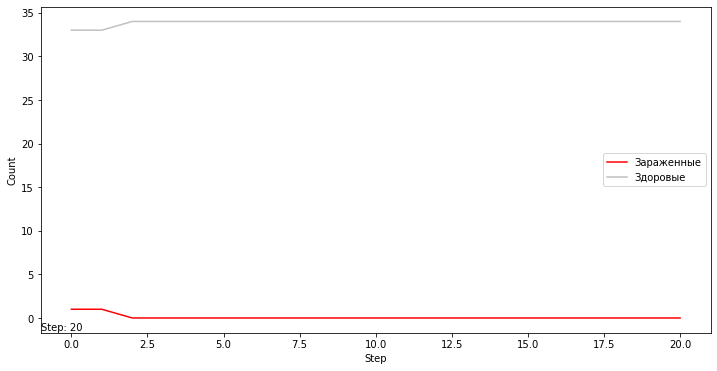

In [17]:
show_infection_dynamic(history_G2, delay=0)

## 5\.2\.3 Реализовать пошаговую визуализацию модели SI из задачи 5.2.1 . Уязвимые и зараженные узлы отражаются цветом. Положения узлов не изменяются.

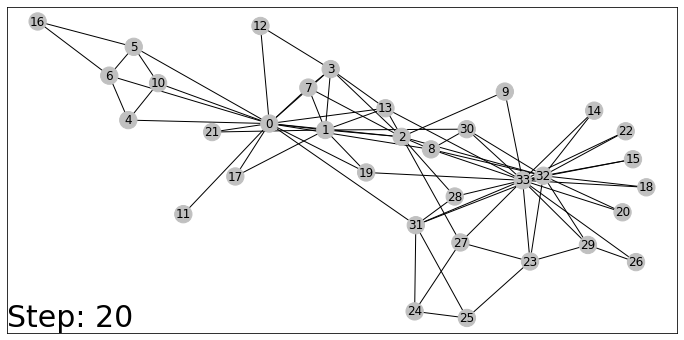

In [18]:
show_infection_history(G2, history_G2)